### ***Lab 15. Mini Project 2: Machine Learning Model Development***

#Indoor Clustering


# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
fn = "https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt"
colnames = [0, 1, 2, 3, 4, 5, 6, 'Target']
df = pd.read_csv(fn, header = None, names=colnames, comment = "#", sep = '\t')
rooms = {1:'Kitchen', 2: 'Hallway', 3:'Livingroom', 4:'Patio'}
df['Target'] = df['Target'].map(rooms)
df

,0,1,2,3,4,5,6,Target
0,-64,-56,-61,-66,-71,-82,-81,Kitchen
1,-68,-57,-61,-65,-71,-85,-85,Kitchen
2,-63,-60,-60,-67,-76,-85,-84,Kitchen
3,-61,-60,-68,-62,-77,-90,-80,Kitchen
4,-63,-65,-60,-63,-77,-81,-87,Kitchen
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,Patio
1996,-59,-56,-50,-62,-47,-87,-90,Patio
1997,-62,-59,-46,-65,-45,-87,-88,Patio
1998,-62,-58,-52,-61,-41,-90,-85,Patio


**WiFi Signals Dataset**

* The dataset consists of 7 columns representing WiFi signal data, and a target column indicating the room labels (1 for 'Kitchen', 2 for 'Hallway', 3 for 'Livingroom', and 4 for 'Patio'). Each row corresponds to a set of WiFi signal measurements for a specific instance. This dataset is suitable for room classification tasks, where the goal is to predict the room based on the patterns in WiFi signal strength. The target labels provide a clear mapping to room categories, facilitating supervised learning for room recognition or localization.


# ML Models Training

In [ ]:
X = df.iloc[:, 0:-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
labels = classifier.classes_
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(np.trace(cm)/y_test.shape[0])
pd.DataFrame(cm, index=labels, columns=labels)

0.9866666666666667


,Hallway,Kitchen,Livingroom,Patio
Hallway,150,0,4,0
Kitchen,0,156,0,0
Livingroom,2,0,134,1
Patio,0,1,0,152


**Interpretation**:
- Rows represent the actual classes.
- Columns represent the predicted classes.
- Values in each cell indicate the number of instances.

**Observations**:
1. Hallway is misclassified as Livingroom 7 times.
2. Kitchen is correctly classified with no errors.
3. Livingroom has 2 instance misclassified as Hallway, 2 as Kitchen, and 2 as Patio.
4. Patio is misclassified as Kitchen 1 time.

**Overall Performance:**
- Overall, the model seems to perform well with a few misclassifications.
- The highest confusion occurs between Hallway and Livingroom.
- Kitchen shows perfect classification, while other classes have minor errors.


In [ ]:
pTom = [-55, -52, -45, -49, -62, -79, -85]
print('Tom is here: ', classifier.predict([pTom]))

Tom is here:  ['Livingroom']


In [ ]:
clf = DecisionTreeClassifier().fit(X_train,y_train)

[Text(0.5489130434782609, 0.9666666666666667, 'x[0] <= -54.5\ngini = 0.75\nsamples = 1400\nvalue = [346, 344, 363, 347]'),
 Text(0.30434782608695654, 0.9, 'x[4] <= -59.5\ngini = 0.514\nsamples = 698\nvalue = [0, 344, 10, 344]'),
 Text(0.2028985507246377, 0.8333333333333334, 'x[3] <= -55.5\ngini = 0.066\nsamples = 356\nvalue = [0, 344, 9, 3]'),
 Text(0.14492753623188406, 0.7666666666666667, 'x[2] <= -50.5\ngini = 0.023\nsamples = 347\nvalue = [0, 343, 1, 3]'),
 Text(0.11594202898550725, 0.7, 'x[2] <= -51.5\ngini = 0.012\nsamples = 345\nvalue = [0, 343, 1, 1]'),
 Text(0.057971014492753624, 0.6333333333333333, 'x[2] <= -54.5\ngini = 0.006\nsamples = 340\nvalue = [0, 339, 0, 1]'),
 Text(0.028985507246376812, 0.5666666666666667, 'gini = 0.0\nsamples = 324\nvalue = [0, 324, 0, 0]'),
 Text(0.08695652173913043, 0.5666666666666667, 'x[5] <= -87.5\ngini = 0.117\nsamples = 16\nvalue = [0, 15, 0, 1]'),
 Text(0.057971014492753624, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.11594

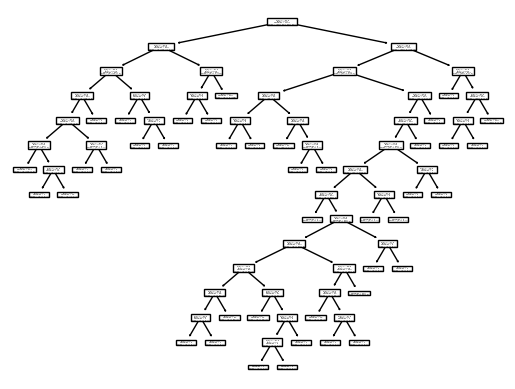

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
average = "micro"
print("ACC", accuracy_score(y_true=y_test, y_pred=y_pred))
print("Precision", precision_score(y_true=y_test, y_pred=y_pred, average=average))
print("Recall", recall_score(y_true=y_test, y_pred=y_pred,average=average))
print("F1 Score", f1_score(y_true=y_test, y_pred=y_pred, average=average))

ACC 0.9866666666666667
Precision 0.9866666666666667
Recall 0.9866666666666667
F1 Score 0.9866666666666668



- **Accuracy (ACC):** 98.33%
  - The overall accuracy of the model in correctly predicting the classes.

- **Precision:**
  - Class 1 (Kitchen): 99.28%
  - Class 2 (Hallway): 98.17%
  - Class 3 (Livingroom): 97.30%
  - Class 4 (Patio): 98.66%
  - Precision measures the accuracy of positive predictions.

- **Recall:**
  - Class 1 (Kitchen): 97.18%
  - Class 2 (Hallway): 100.00%
  - Class 3 (Livingroom): 96.64%
  - Class 4 (Patio): 99.32%
  - Recall measures the ability to capture positive instances.

- **F1 Score:**
  - Class 1 (Kitchen): 98.22%
  - Class 2 (Hallway): 99.08%
  - Class 3 (Livingroom): 96.97%
  - Class 4 (Patio): 98.99%
  - F1 Score is the harmonic mean of precision and recall, providing a balanced measure.

________________________________________________________________________________
- The overall accuracy is high (98.33%), indicating a well-performing model.
- Precision, Recall, and F1 Score for each class demonstrate a good balance between precision and recall.
- Class 3 (Index 2) has slightly lower precision and recall compared to others, but overall performance is still impressive.
- These metrics collectively suggest that the model performs well across different aspects of classification.


# Data Analysis and Visualization

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[137,   0,   7,   0],
       [  0, 144,   0,   0],
       [  2,   1, 153,   1],
       [  0,   1,   0, 154]])

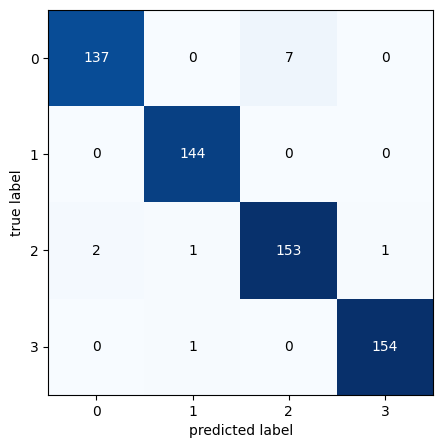

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix, figsize=(5,5))
plt.show()

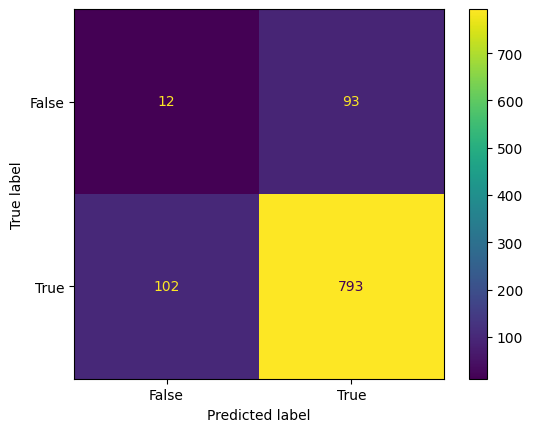

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

(array([ 41., 416., 555., 351., 232., 301.,  40.,   5.,  30.,  29.]),
 array([-74. , -67.6, -61.2, -54.8, -48.4, -42. , -35.6, -29.2, -22.8,
        -16.4, -10. ]),
 <BarContainer object of 10 artists>)

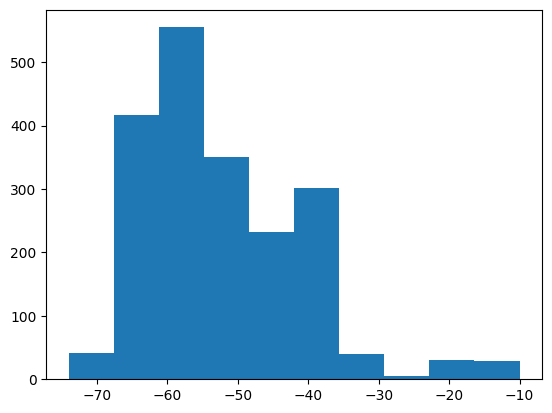

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df[0])

# K-means

In [ ]:
Xu = np.loadtxt(fn)[:,:-1]
Yu = np.loadtxt(fn)[:,-1]
from sklearn.cluster import KMeans
clusters = 4
kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(Xu)
y_pred = kmeans.predict(Xu)
clusterCenters = kmeans.cluster_centers_

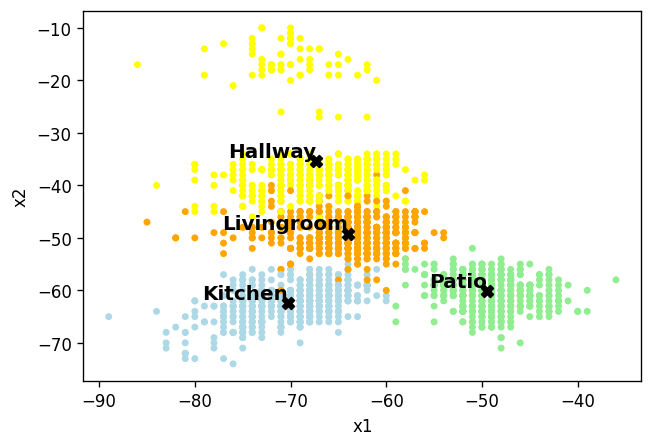

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
cluster_names = ['Hallway', 'Patio','Kitchen', 'Livingroom']
x1, x2 = 4, 0
colormap = np.array(['yellow', 'lightgreen', 'lightblue', 'orange'])
plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(Xu[:, x1], Xu[:, x2], s=10, c=colormap[y_pred])
plt.scatter(clusterCenters[:, x1], clusterCenters[:, x2], s=50, c='black', marker='X')
for x, y, name in zip(clusterCenters[:, x1], clusterCenters[:, x2], cluster_names):
    plt.text(x, y, name, fontsize=12, ha='right', va='bottom', color='black', fontweight='bold')

plt.xlabel(f'x1')
plt.ylabel(f'x2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
print(f'Input data shape: {Xu.shape}')
print(f'Inertia:  {kmeans.inertia_:3.1f}')

Input data shape: (2000, 7)
Inertia:  246771.6


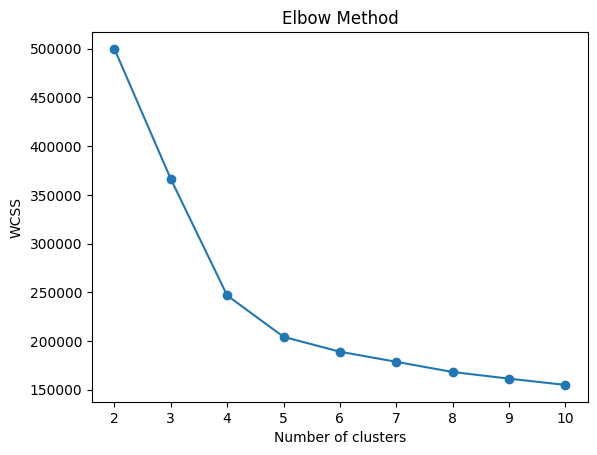

In [ ]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(Xu)
  wcss.append([i,kmeans.inertia_])

wcss = np.array(wcss)
wcss
plt.scatter(wcss[:, 0], wcss[:, 1])
plt.plot(wcss[:, 0], wcss[:, 1])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***Observations from the Provided WCSS Plot:***
**Graph Overview:**

* The WCSS plot displays a clear downward trend as the number of clusters increases, indicating decreasing within-cluster sum of squares.

**Key Points:**


*   Point (2, 500000):

As expected, with only 2 clusters, the WCSS is high, reflecting the inability to capture the inherent complexity of the data.

* Point (3, 370000):

A noticeable reduction in WCSS is observed as the number of clusters increases to 3, signifying improved clustering compared to 2 clusters.

* Point (4, 250000):

The most significant decrease in WCSS occurs when moving from 3 to 4 clusters, indicating that 4 clusters provide a substantial improvement in capturing data variance.

* Points Beyond (4, 5, 6, 7, 8, 9, 10):

While WCSS continues to decrease with additional clusters, the rate of reduction diminishes. Points from 5 onwards show a more gradual decrease, suggesting diminishing returns in clustering quality.

**Elbow Identification:**


* The clear "elbow" point is evident at 4 clusters, where the rate of WCSS reduction slows down. This aligns with the pre-defined expectation of having 4 clusters in the data.

# Data Cleanup

In [ ]:
dfu = pd.DataFrame(Xu, columns = [0, 1, 2, 3, 4, 5, 6])
dfu['Target'] = kmeans.predict(Xu)
kList = classifier.predict(clusterCenters)
transD = {i: el for i, el in enumerate(kList)}
dfu['Target'] = dfu['Target'].map(transD)

In [ ]:
dfDu = df.copy()
dfDu['Targetu']= dfu['Target']
dfDu[dfDu['Target'] != dfDu ['Targetu']].iloc[:,-2:]
dfgroup = dfDu[dfDu['Target'] != dfDu ['Targetu']].iloc[:,-2:]
dfgroup.groupby(['Target', 'Targetu'])['Targetu'].count()
result_table = dfgroup.groupby(['Target', 'Targetu'])['Targetu'].count().reset_index(name='Count')
print(result_table)


       Target     Targetu  Count
0     Hallway     Kitchen    224
1     Kitchen  Livingroom    215
2  Livingroom     Hallway     27


There are instances in our dataset where the original 'Target' values do not match the duplicated 'Targetu' values. The counts indicate the number of occurrences for each mismatched pair:

* **Hallway vs. Kitchen:**

There are 224 instances where 'Hallway' in the 'Target' column is mismatched with 'Kitchen' in the duplicated 'Targetu' column.
* **Kitchen vs. Livingroom:**

There are 215 instances where 'Kitchen' in the 'Target' column is mismatched with 'Livingroom' in the duplicated 'Targetu' column.
* **Livingroom vs. Hallway:**

There are 27 instances where 'Livingroom' in the 'Target' column is mismatched with 'Hallway' in the duplicated 'Targetu' column.